In [10]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [12]:
import pandas as pd

# Try different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        data = pd.read_csv('C:/Users/sarat/OneDrive/Desktop/Mail Spam/spam.csv', encoding=encoding)
        print(f"File read successfully with encoding: {encoding}")
        break
    except Exception as e:
        print(f"Error reading file with encoding {encoding}: {e}")



Error reading file with encoding utf-8: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte
File read successfully with encoding: latin1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
 # Dropping the redundent looking collumns (for this project)
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
 # Renaming the columns because I feel fancy today
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


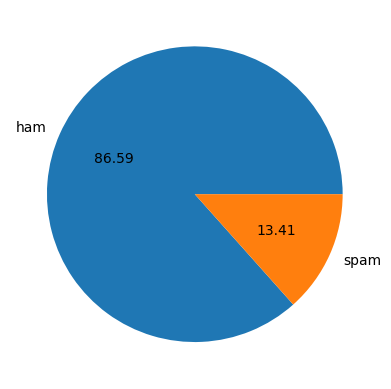

In [16]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [17]:
import pandas as pd
import re

# Assuming 'data' is your DataFrame with columns 'Target' and 'Text'

# Feature 1: Text Length
data['text_length'] = data['Text'].apply(len)  # Number of characters

# Feature 2: Presence of Special Characters or Numbers
data['has_digits'] = data['Text'].str.contains('\d', regex=True)
data['has_special_chars'] = data['Text'].str.contains('[^A-Za-z0-9\s]', regex=True)

# Feature 3: Uppercase Percentage
data['uppercase_percentage'] = data['Text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) * 100 if len(x) > 0 else 0)

# Feature 4: Presence of URLs
data['has_url'] = data['Text'].str.contains('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', regex=True)

# Display the updated DataFrame
data.head()


,Target,Text,text_length,has_digits,has_special_chars,uppercase_percentage,has_url
0,ham,"Go until jurong point, crazy.. Available only ...",111,False,True,2.702703,False
1,ham,Ok lar... Joking wif u oni...,29,False,True,6.896552,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,True,True,6.451613,False
3,ham,U dun say so early hor... U c already then say...,49,False,True,4.081633,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,False,True,3.278689,False


In [18]:
import seaborn as sns

In [19]:
data.head()

,Target,Text,text_length,has_digits,has_special_chars,uppercase_percentage,has_url
0,ham,"Go until jurong point, crazy.. Available only ...",111,False,True,2.702703,False
1,ham,Ok lar... Joking wif u oni...,29,False,True,6.896552,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,True,True,6.451613,False
3,ham,U dun say so early hor... U c already then say...,49,False,True,4.081633,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,False,True,3.278689,False


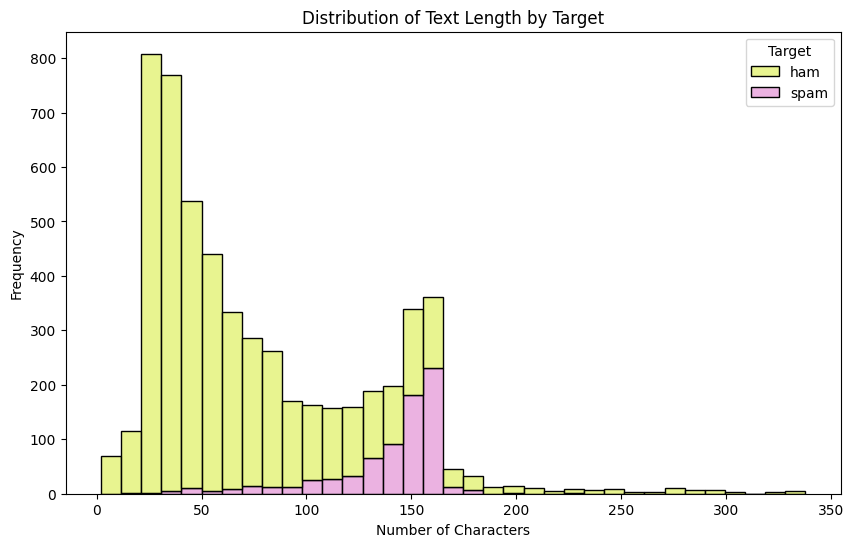

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the CSV file into a DataFrame with explicit encoding
data = pd.read_csv('C:/Users/sarat/OneDrive/Desktop/Mail Spam/spam.csv', encoding='ISO-8859-1')

# Dropping the redundant-looking columns (for this project)
to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data = data.drop(to_drop, axis=1)

# Renaming the columns
data.rename(columns={"v1": "Target", "v2": "Text"}, inplace=True)

# Calculating the length of the text in the 'Text' column
data['No_of_Characters'] = data['Text'].apply(len)

# Filtering out rows with text length less than 350
data = data[data['No_of_Characters'] < 350]

# Visualizing histogram for 'No_of_Characters' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='No_of_Characters', hue='Target', palette=['#E1F16B', '#E598D8'], multiple='stack')
plt.title('Distribution of Text Length by Target')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Printing a sample of the first 5 texts before cleaning
print("\033[1m\u001b[45;1m The First 5 Texts Before Cleaning:\033[0m")
for text in data["Text"][:5]:
   print(text)


 The First 5 Texts Before Cleaning:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [23]:
import re

# Defining a function to clean up the text
def clean_text(text):
    # Replacing all non-alphabetic characters with a space
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    # Converting to lowercase
    cleaned_text = cleaned_text.lower()
    # Removing extra whitespaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Applying the clean_text function to the 'Text' column and creating a new 'Clean_Text' column
data["Clean_Text"] = data["Text"].apply(clean_text)

# Displaying the first 5 texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m")
for text in data["Clean_Text"][:5]:
    print(text)


 The First 5 Texts after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


In [24]:
import nltk

# Tokenizing the cleaned text and creating a new column 'Tokenize_Text'
data["Tokenize_Text"] = data["Clean_Text"].apply(nltk.word_tokenize)

# Printing the first 5 tokenized texts
print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m")
for tokens in data["Tokenize_Text"][:5]:
    print(tokens)


 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


In [25]:
from nltk.corpus import stopwords
import nltk

# Ensure the NLTK stopwords are downloaded
nltk.download('stopwords')

# Defining the function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

# Applying the remove_stopwords function to create a new column
data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

# Printing the first 5 texts after removing the stopwords
print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m")
for text in data["Nostopword_Text"][:5]:
    print(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [26]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download the NLTK WordNet data if not already downloaded
nltk.download('wordnet')

# Initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_word(text):
    # Lemmatize each word in the text
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas

# Applying the lemmatization function to create a new column
data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)

# Printing the first 5 texts after lemmatization
print("\033[1m\u001b[45;1m The First 5 Texts after lemmatization:\033[0m", *data["Lemmatized_Text"][:5], sep="\n")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 The First 5 Texts after lemmatization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


In [27]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder
label_encoder = LabelEncoder()
# Encoding the 'Target' variable
y = label_encoder.fit_transform(data['Target'])

In [33]:
# Creating a corpus of text features to encode further into vectorized form
corpus = []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

# Printing the first 5 lines in the corpus
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m", *corpus[:5], sep="\n")


 The First 5 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Transforming the corpus into TF-IDF vectors
X = tfidf_vectorizer.fit_transform(corpus).toarray()

# Displaying the type of the feature matrix
print("Type of feature matrix X:", X.dtype)


Type of feature matrix X: float64


In [35]:
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [36]:
# Assuming 'corpus' is the list of cleaned texts
 # Creating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust␣max_features as needed
 # Fitting the vectorizer on the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(data[data['Target']==1]['Clean_Text'].str.cat(sep =" "))

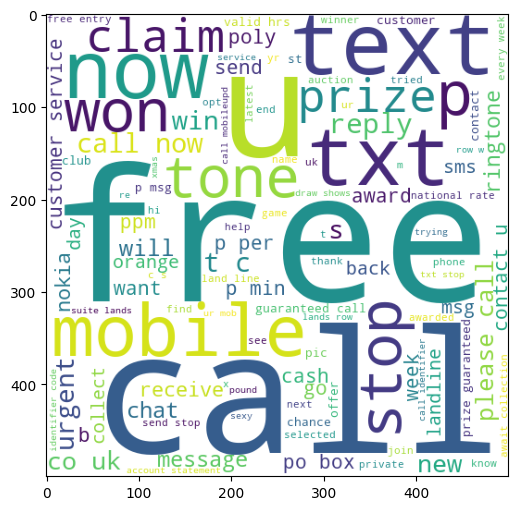

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(data[data['Target']==0]['Clean_Text'].str.cat(sep =" "))

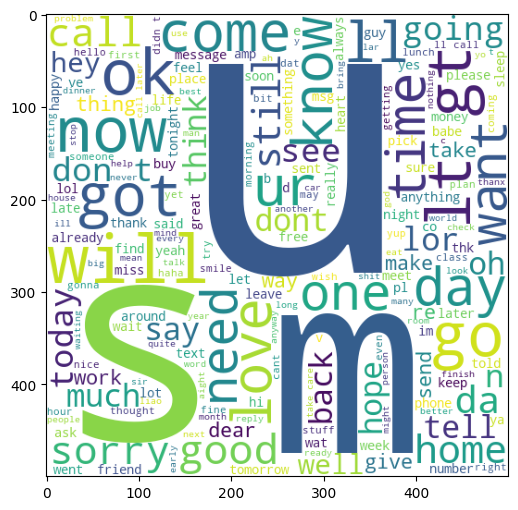

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [38]:
data.head()

,Target,Text,No_of_Characters,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


Model Building

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Encoding the 'Target' variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Target'])

# Creating a corpus of lemmatized text
corpus = [' '.join(row) for row in data["Lemmatized_Text"]]

# Transforming text data into numbers
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Splitting the testing and training sets with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build pipelines for four different classifiers
nb_model = Pipeline([('classifier', MultinomialNB())])
rf_model = Pipeline([('classifier', RandomForestClassifier(random_state=42))])
knn_model = Pipeline([('classifier', KNeighborsClassifier())])
svm_model = Pipeline([('classifier', SVC())])

# Fit all the models on the training data
nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Get cross-validation on the training set for all the models for accuracy
models = [nb_model, rf_model, knn_model, svm_model]
model_names = ['Naïve Bayes', 'RandomForest', 'KNeighbors', 'SVM']
for model, name in zip(models, model_names):
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} Cross-Validation Accuracy: {cross_val_acc.mean()}')


Naïve Bayes Cross-Validation Accuracy: 0.9632715297033222
RandomForest Cross-Validation Accuracy: 0.9783684755781712
KNeighbors Cross-Validation Accuracy: 0.9100960317702145
SVM Cross-Validation Accuracy: 0.9756639954497903


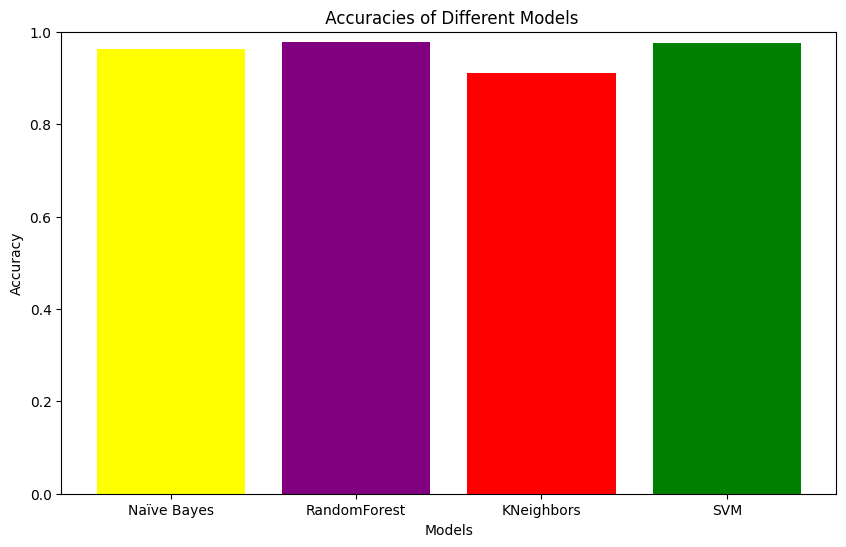

In [51]:
import matplotlib.pyplot as plt

# Cross-validation accuracies
cross_val_accuracies = []
for model in models:
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cross_val_accuracies.append(cross_val_acc)

# Define colors for each model
colors = ['yellow', 'purple', 'red', 'green']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, cross_val_accuracies, color=colors)
plt.title(' Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()


In [52]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
file_path = 'C:/Users/sarat/OneDrive/Desktop/Mail Spam/spam.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the data
print(data.head())

# Function to clean the text
def clean_text(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', str(text))
    cleaned_text = cleaned_text.lower()
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Clean the 'Text' column
data['Clean_Text'] = data['v2'].apply(clean_text)

# Encoding the 'Target' variable (assuming 'ham' as 0 and 'spam' as 1)
data['Target'] = data['v1'].map({'ham': 0, 'spam': 1})

# Creating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fitting the vectorizer on the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(data['Clean_Text']).toarray()
y = data['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Creating and training the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2%}")


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Accuracy on the test set: 97.58%


In [2]:
# Input Section
new_sms = input("Enter the SMS text: ")

# Cleaning the input text
cleaned_sms = clean_text(new_sms)

# Transforming the cleaned text into a TF-IDF vector
new_sms_tfidf = tfidf_vectorizer.transform([cleaned_sms]).toarray()

# Making the prediction using the trained RandomForest model
prediction = rf_model.predict(new_sms_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2%}")

# Displaying the result
if prediction == 0:
    print("The SMS is classified as 'ham'.")
else:
    print("The SMS is classified as 'spam'.")


Accuracy on the test set: 97.58%
The SMS is classified as 'spam'.
